# Problem 2

In this Jupyter notebook, we visualize how HMMs work. This visualization corresponds to problem 2 in set 6.

Assuming your HMM module is complete and saved at the correct location, you can simply run all cells in the notebook without modification.

In [17]:
import os
import numpy as np
from IPython.display import HTML

from HMM import unsupervised_HMM
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    sample_sentence,
    visualize_sparsities,
    animate_emission
)

## Visualization of the dataset

We will be using the Constitution as our dataset. First, we visualize the entirety of the Constitution as a wordcloud:

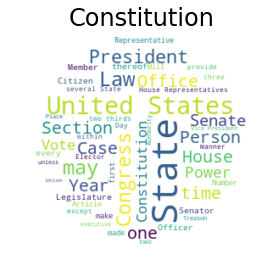

In [18]:
text = open(os.path.join(os.getcwd(), 'data/constitution.txt')).read()
wordcloud = text_to_wordcloud(text, title='Constitution')

## Training an HMM

Now we train an HMM on our dataset. We use 10 hidden states and train over 100 iterations:

In [19]:
obs, obs_map = parse_observations(text)
hmm8 = unsupervised_HMM(obs, 10, 100)

## Part G: Visualization of the sparsities of A and O

We can visualize the sparsities of the A and O matrices by treating the matrix entries as intensity values and showing them as images. What patterns do you notice?

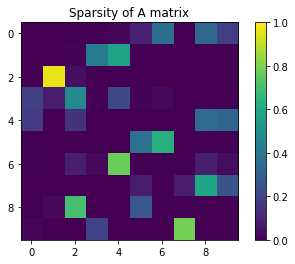

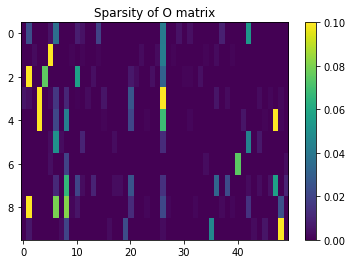

In [20]:
visualize_sparsities(hmm8, O_max_cols=50)

## Generating a sample sentence

As you have already seen, an HMM can be used to generate sample sequences based on the given dataset. Run the cell below to show a sample sentence based on the Constitution.

In [21]:
print('Sample Sentence:\n====================')
print(sample_sentence(hmm8, obs_map, n_words=25))

Sample Sentence:
In the president may propose disability propose of united term eight which granting in section shall be made against stated profit cannot belonging law to...


## Part H: Using varying numbers of hidden states

Using different numbers of hidden states can lead to different behaviours in the HMMs. Below, we train several HMMs with 1, 2, 4, and 16 hidden states, respectively. What do you notice about their emissions? How do these emissions compare to the emission above?

In [22]:
hmm1 = unsupervised_HMM(obs, 1, 100)
print('\nSample Sentence:\n====================')
print(sample_sentence(hmm1, obs_map, n_words=25))


Sample Sentence:
Or state they on territory the at states and death offences be thirds erazure connecticut of house constitution representatives by consist thousand in years consist...


In [23]:
hmm2 = unsupervised_HMM(obs, 2, 100)
print('\nSample Sentence:\n====================')
print(sample_sentence(hmm2, obs_map, n_words=25))


Sample Sentence:
And flee the second of the during shall united and writing trust shall journal they the president shall same shall to the person treaty states...


In [24]:
hmm4 = unsupervised_HMM(obs, 4, 100)
print('\nSample Sentence:\n====================')
print(sample_sentence(hmm4, obs_map, n_words=25))


Sample Sentence:
Taxes proceedings years the to coin and happen except houses and be appointed officers all throughout different heads and the a shall controversies each that...


In [25]:
hmm16 = unsupervised_HMM(obs, 16, 100)
print('\nSample Sentence:\n====================')
print(sample_sentence(hmm16, obs_map, n_words=25))


Sample Sentence:
Revenue least may be post congress to take equally in affirmation money day representatives and third and piracies and insure and sent necessary majority thirds...


## Part I: Visualizing the wordcloud of each state

Below, we visualize each state as a wordcloud by sampling a large emission from the state:

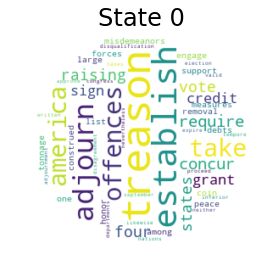

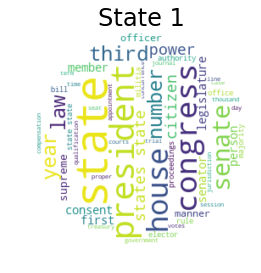

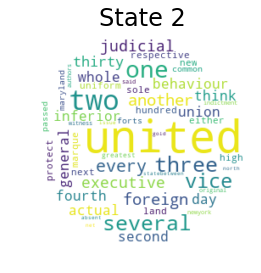

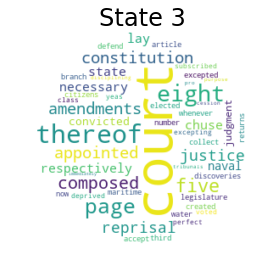

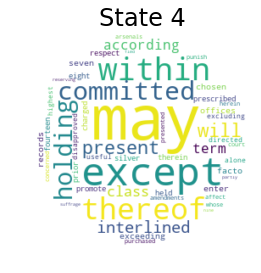

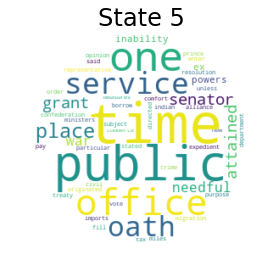

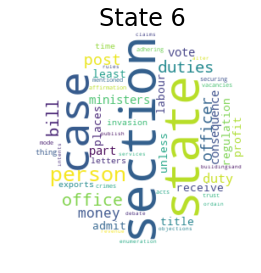

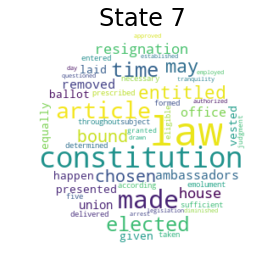

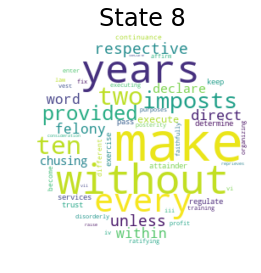

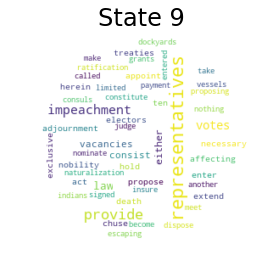

In [26]:
wordclouds = states_to_wordclouds(hmm8, obs_map)

## Visualizing the process of an HMM generating an emission

The visualization below shows how an HMM generates an emission. Each state is shown as a wordcloud on the plot, and transition probabilities between the states are shown as arrows. The darker an arrow, the higher the transition probability.

At every frame, a transition is taken and an observation is emitted from the new state. A red arrow indicates that the transition was just taken. If a transition stays at the same state, it is represented as an arrowhead on top of that state.

Use fullscreen for a better view of the process.

/Users/ankush/Library/Python/3.7/lib/python/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)



Animating...


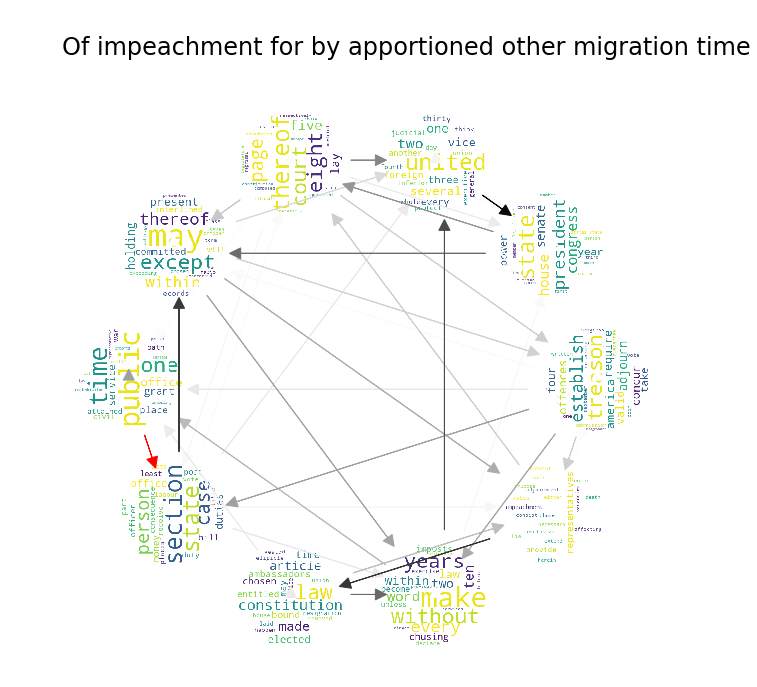

In [27]:
anim = animate_emission(hmm8, obs_map, M=8)
HTML(anim.to_html5_video())